<a href="https://colab.research.google.com/github/musicangora/MakeDataset_IXI/blob/main/MakeDatasets_IXI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 参考
- [h5pyのかんたんな使い方](https://www.qoosky.io/techs/861b4ae419)
- [NRRDファイルの読み込み](https://qiita.com/tatsunidas/items/32d3d0b362b0864b8579)
- [kaggle pix2pix](https://www.kaggle.com/vikramtiwari/pix2pix-dataset)
- [[Linux]ファイルの圧縮、解凍方法](https://qiita.com/supersaiakujin/items/c6b54e9add21d375161f)
- [【メモ】Linux圧縮/解凍コマンド
Linux](https://qiita.com/t-kubo0325/items/158e02aa6b8e62b76242)
- [Example on BRATS2018](https://colab.research.google.com/github/IAmSuyogJadhav/3d-mri-brain-tumor-segmentation-using-autoencoder-regularization/blob/master/Example_on_BRATS2018.ipynb)


## データセット入手先
[IXI Dataset - Brain Development](https://brain-development.org/ixi-dataset/)

※T2とPDをダウンロード

In [4]:
# .tarをルートに展開
# tar -option[c:新規ファイルを作る c:進捗を表示 f:ファイル名の指定 x:解凍 z:.gz j:.bz2 J:.xz]
!tar -xvf "/content/drive/My Drive/IXI_Datasets/IXI-T2.tar"
!tar -xvf "/content/drive/My Drive/IXI_Datasets/IXI-PD.tar"

IXI002-Guys-0828-T2.nii.gz
IXI012-HH-1211-T2.nii.gz
IXI013-HH-1212-T2.nii.gz
IXI014-HH-1236-T2.nii.gz
IXI015-HH-1258-T2.nii.gz
IXI016-Guys-0697-T2.nii.gz
IXI017-Guys-0698-T2.nii.gz
IXI019-Guys-0702-T2.nii.gz
IXI020-Guys-0700-T2.nii.gz
IXI021-Guys-0703-T2.nii.gz
IXI022-Guys-0701-T2.nii.gz
IXI023-Guys-0699-T2.nii.gz
IXI024-Guys-0705-T2.nii.gz
IXI025-Guys-0852-T2.nii.gz
IXI026-Guys-0696-T2.nii.gz
IXI027-Guys-0710-T2.nii.gz
IXI028-Guys-1038-T2.nii.gz
IXI029-Guys-0829-T2.nii.gz
IXI030-Guys-0708-T2.nii.gz
IXI031-Guys-0797-T2.nii.gz
IXI033-HH-1259-T2.nii.gz
IXI034-HH-1260-T2.nii.gz
IXI035-IOP-0873-T2.nii.gz
IXI036-Guys-0736-T2.nii.gz
IXI037-Guys-0704-T2.nii.gz
IXI038-Guys-0729-T2.nii.gz
IXI039-HH-1261-T2.nii.gz
IXI040-Guys-0724-T2.nii.gz
IXI041-Guys-0706-T2.nii.gz
IXI042-Guys-0725-T2.nii.gz
IXI043-Guys-0714-T2.nii.gz
IXI044-Guys-0712-T2.nii.gz
IXI045-Guys-0713-T2.nii.gz
IXI046-Guys-0824-T2.nii.gz
IXI048-HH-1326-T2.nii.gz
IXI049-HH-1358-T2.nii.gz
IXI050-Guys-0711-T2.nii.gz
IXI051-HH-1328-T2.ni

In [5]:
# .gzをルートに展開
!gunzip -kv "/content/IXI002-Guys-0828-T2.nii.gz"
!gunzip -kv "/content/IXI002-Guys-0828-PD.nii.gz"

!gunzip -kz "/content/IXI425-IOP-0988-T2.nii.gz"
!gunzip -kz "/content/IXI425-IOP-0988-PD.nii.gz"

!gunzip -kz "/content/IXI012-HH-1211-T2.nii.gz"
!gunzip -kz "/content/IXI012-HH-1211-PD.nii.gz"

!gunzip -kz "/content/IXI013-HH-1212-T2.nii.gz"
!gunzip -kz "/content/IXI013-HH-1212-PD.nii.gz"

/content/IXI002-Guys-0828-T2.nii.gz:	 65.2% -- replaced with /content/IXI002-Guys-0828-T2.nii
/content/IXI002-Guys-0828-PD.nii.gz:	 62.7% -- replaced with /content/IXI002-Guys-0828-PD.nii
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.
gzip: invalid option -- 'z'
Try `gzip --help' for more information.


In [6]:
!pip install simpleitk

     |████████████████████████████████| 44.9MB 83kB/s 


## Pix2Pix用のデータセットの構築
### Pix2Pixのデータセットの構成例
```
facades/
    ├　　test/
    │  └ 100files
    ├ train/
    │  └ 400files
    └ val/
        └ 100files
```

In [9]:
# ------------------
# データの読み込み
# ------------------
import numpy as np
import SimpleITK as sitk
from PIL import Image
import matplotlib.pyplot as plt

# .niiファイルを読み込み、ndarrayに変換
IXI002_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI002-Guys-0828-T2.nii'))
IXI002_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI002-Guys-0828-PD.nii'))

IXI425_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI425-IOP-0988-T2.nii'))
IXI425_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI425-IOP-0988-PD.nii'))

IXI012_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI012-HH-1211-T2.nii'))
IXI012_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI012-HH-1211-PD.nii'))

IXI013_T2_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI013-HH-1212-T2.nii'))
IXI013_PD_nd = sitk.GetArrayFromImage(sitk.ReadImage('/content/IXI013-HH-1212-PD.nii'))

# 形状の表示
print("002 T2 shape: ", IXI002_T2_nd.shape)
print("002 PD shape: ", IXI002_PD_nd.shape)

print("425 T2 shape: ", IXI425_T2_nd.shape)
print("425 PD shape: ", IXI425_PD_nd.shape)

print("012 T2 shape: ", IXI012_T2_nd.shape)
print("012 PD shape: ", IXI012_PD_nd.shape)

print("013 T2 shape: ", IXI013_T2_nd.shape)
print("013 PD shape: ", IXI013_PD_nd.shape)

# 形式の表示
print("\nformat: ", IXI002_T2_nd[0].dtype)


002 T2 shape:  (130, 256, 256)
002 PD shape:  (130, 256, 256)
425 T2 shape:  (136, 256, 256)
425 PD shape:  (136, 256, 256)
012 T2 shape:  (112, 256, 256)
012 PD shape:  (112, 256, 256)
013 T2 shape:  (116, 256, 256)
013 PD shape:  (116, 256, 256)

format:  int16


In [10]:
# -------------
# 画像の結合
# -------------
def joint_imgs(t2_nd, pd_nd):
    t2pd_imgs = np.empty((0, 256, 512))  # 結合後のサイズは256x512
    for i in range(t2_nd.shape[0]):
        t2pd = np.concatenate( (t2_nd[i], pd_nd[i]), axis=1 )  # 2次元画像を2次元のまま横にくっつける
        t2pd = t2pd[np.newaxis]  # 2次元画像を3次元テンソルへ
        t2pd_imgs = np.append(t2pd_imgs, t2pd, axis=0)  # 3次元どうしになったのでappendで結合できる
    return t2pd_imgs

# 訓練データの生成
tmp = np.append( joint_imgs(IXI002_T2_nd, IXI002_PD_nd), joint_imgs(IXI012_T2_nd, IXI012_PD_nd), 0 )  # すでに3次元になってるので結合はappendでいい
train_data = np.append( tmp, joint_imgs(IXI013_T2_nd, IXI013_PD_nd), 0 )
print("train_data: ", train_data.shape)

# テストデータの生成
test_data = joint_imgs(IXI425_T2_nd, IXI425_PD_nd)
print("test_data: ", test_data.shape)

train_data:  (358, 256, 512)
test_data:  (136, 256, 512)


### ディレクトリ構成
``` 
T2PD_pix2pix/
        ├ test/
        │  └ 136files
        └ train/
            └ 358files
```

In [11]:
# -----------------------
# ディレクトリの作成
# -----------------------
!mkdir T2PD_pix2pix/
!mkdir T2PD_pix2pix/test/
!mkdir T2PD_pix2pix/train/ 

In [15]:
# ----------------------
# 16bit tiffの保存
# ----------------------
# 訓練データの保存
for i in range(train_data.shape[0]):
    Image.fromarray(train_data[i].astype(np.uint16)).save('/content/T2PD_pix2pix/train/'+str(i)+'.tiff')

# テストデータの保存
for i in range(test_data.shape[0]):
    Image.fromarray(test_data[i].astype(np.uint16)).save('/content/T2PD_pix2pix/test/'+str(i)+'.tiff')


Load image format:  uint16


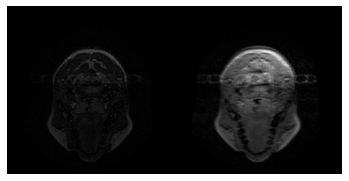

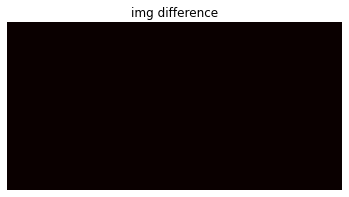

In [28]:
# ------------------------------
# 保存されたデータの確認
# ------------------------------
#画像の読み込み
im = Image.open("/content/T2PD_pix2pix/test/0.tiff")

#画像をarrayに変換
im_list = np.asarray(im)
print("Load image format: ", im_list.dtype)
plt.axis('off')
plt.imshow(im_list, cmap='gray')
plt.show()

# 画像の差分を表示
img_diff = im_list - test_data[0]
plt.axis('off')
plt.title('img difference')
plt.imshow(img_diff, cmap='hot')
plt.show()

In [38]:
# --------------------------------------------------
# データセットファイルをGoogle Driveへ保存
# --------------------------------------------------
# 圧縮
!zip -r T2PD_pix2pix.zip '/content/T2PD_pix2pix/'
# コピー
!cp -r /content/T2PD_pix2pix.zip '/content/drive/My Drive/'

updating: content/T2PD_pix2pix/ (stored 0%)
updating: content/T2PD_pix2pix/train/ (stored 0%)
updating: content/T2PD_pix2pix/train/174.tiff (deflated 46%)
updating: content/T2PD_pix2pix/train/141.tiff (deflated 48%)
updating: content/T2PD_pix2pix/train/348.tiff (deflated 67%)
updating: content/T2PD_pix2pix/train/253.tiff (deflated 47%)
updating: content/T2PD_pix2pix/train/55.tiff (deflated 57%)
updating: content/T2PD_pix2pix/train/169.tiff (deflated 46%)
updating: content/T2PD_pix2pix/train/68.tiff (deflated 58%)
updating: content/T2PD_pix2pix/train/91.tiff (deflated 64%)
updating: content/T2PD_pix2pix/train/269.tiff (deflated 46%)
updating: content/T2PD_pix2pix/train/58.tiff (deflated 58%)
updating: content/T2PD_pix2pix/train/115.tiff (deflated 76%)
updating: content/T2PD_pix2pix/train/152.tiff (deflated 47%)
updating: content/T2PD_pix2pix/train/84.tiff (deflated 62%)
updating: content/T2PD_pix2pix/train/127.tiff (deflated 87%)
updating: content/T2PD_pix2pix/train/102.tiff (deflated 6

## CycleGAN用データセットの構築
### CycleGANのデータセットの構成
```
datasets/
    ├ trainA/
    ├ trainB/
    ├ testA/
    └ testB/
```
    


In [40]:
# -------------------
# 訓練データの生成
# -------------------

# trainT2
tmpA = np.append(IXI002_T2_nd, IXI012_T2_nd, 0)
train_T2 = np.append(tmpA, IXI013_T2_nd, 0 )
print("train T2 shape: ", train_T2.shape)

#trainPD
tmpB = np.append(IXI002_PD_nd, IXI012_PD_nd, 0)
train_PD = np.append(tmpB, IXI013_PD_nd, 0 )
print("train PD shape: ", train_PD.shape)

train T2 shape:  (358, 256, 256)
train PD shape:  (358, 256, 256)


In [42]:
# -----------------------
# テストデータの作成
# -----------------------
# testT2
test_T2 = IXI425_T2_nd
print("test T2 shape: ", test_T2.shape)

# test PD
test_PD = IXI425_PD_nd
print("test PD shape: ", test_PD.shape)

test T2 shape:  (136, 256, 256)
test PD shape:  (136, 256, 256)


### ディレクトリ構成
```
T2PD_cyclegan/
    ├ trainA/
    │    └ T2 image 358files
    ├ testA/
    │    └ T2 image 136files
    ├ trainB/
    │    └ PD image 358files
    └ testB/
          └ PD image 136files
```

In [45]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (134 kB/s)
Selecting previously unselected package tree.
(Reading database ... 144611 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [52]:
# -----------------------
# ディレクトリの作成
# -----------------------
!mkdir T2PD_cyclegan/
!mkdir T2PD_cyclegan/testA/
!mkdir T2PD_cyclegan/trainA/
!mkdir T2PD_cyclegan/testB/
!mkdir T2PD_cyclegan/trainB/ 

!tree -dF /content/T2PD_cyclegan/

mkdir: cannot create directory ‘T2PD_cyclegan/’: File exists
mkdir: cannot create directory ‘T2PD_cyclegan/testA/’: File exists
mkdir: cannot create directory ‘T2PD_cyclegan/trainA/’: File exists
mkdir: cannot create directory ‘T2PD_cyclegan/testB/’: File exists
mkdir: cannot create directory ‘T2PD_cyclegan/trainB/’: File exists
/content/T2PD_cyclegan/
├── testA
├── testB
├── trainA
└── trainB

4 directories


In [48]:
# ----------------------
# 16bit tiffの保存
# ----------------------
# T2 訓練データの保存
for i in range(train_T2.shape[0]):
    Image.fromarray(train_T2[i].astype(np.uint16)).save('/content/T2PD_cyclegan/trainA/'+str(i)+'.tiff')

# T2 テストデータの保存
for i in range(test_T2.shape[0]):
    Image.fromarray(test_T2[i].astype(np.uint16)).save('/content/T2PD_cyclegan/testA/'+str(i)+'.tiff')

# PD 訓練データの保存
for i in range(train_PD.shape[0]):
    Image.fromarray(train_PD[i].astype(np.uint16)).save('/content/T2PD_cyclegan/trainB/'+str(i)+'.tiff')

# PD テストデータの保存
for i in range(test_PD.shape[0]):
    Image.fromarray(test_PD[i].astype(np.uint16)).save('/content/T2PD_cyclegan/testB/'+str(i)+'.tiff')


Load image format:  uint16
Original image format:  int16


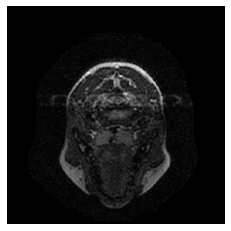

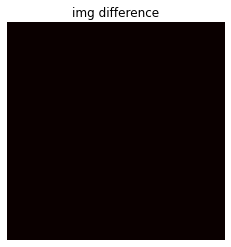

In [62]:
# ------------------------------
# 保存されたデータの確認
# ------------------------------
#画像の読み込み
im = Image.open("/content/T2PD_cyclegan/testA/0.tiff")

#画像をarrayに変換
im_list = np.asarray(im)
print("Load image format: ", im_list.dtype)
print("Original image format: ", test_T2[0].dtype)
plt.axis('off')
plt.imshow(im_list, cmap='gray')
plt.show()

# 画像の差分を表示
img_diff = im_list - test_T2[0]
plt.axis('off')
plt.title('img difference')
plt.imshow(img_diff, cmap='hot')
plt.show()


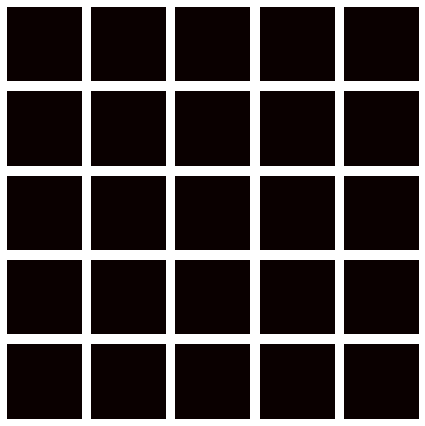

In [89]:
# 画像の差分をランダムに表示
arr = np.random.randint(0, test_T2.shape[0], (1, 25))

plt.figure(figsize=(6, 6))
for i, idx in enumerate(arr[0]):
    path = '/content/T2PD_cyclegan/testA/%s.tiff' % idx
    im = Image.open(path)
    tmp = np.asarray(im)
    plt.subplot(5, 5, i+1)
    img = test_T2[idx] - tmp
    plt.axis('off')
    plt.imshow(img, cmap='hot')
plt.tight_layout(True)
plt.show()

In [61]:
# --------------------------------------------------
# データセットファイルをGoogle Driveへ保存
# --------------------------------------------------
# 圧縮
!zip -r T2PD_cyclegan.zip '/content/T2PD_cyclegan/'
# コピー
!cp -r /content/T2PD_cyclegan.zip '/content/drive/My Drive/'

  adding: content/T2PD_cyclegan/ (stored 0%)
  adding: content/T2PD_cyclegan/trainA/ (stored 0%)
  adding: content/T2PD_cyclegan/trainA/174.tiff (deflated 49%)
  adding: content/T2PD_cyclegan/trainA/141.tiff (deflated 51%)
  adding: content/T2PD_cyclegan/trainA/348.tiff (deflated 68%)
  adding: content/T2PD_cyclegan/trainA/253.tiff (deflated 50%)
  adding: content/T2PD_cyclegan/trainA/55.tiff (deflated 59%)
  adding: content/T2PD_cyclegan/trainA/169.tiff (deflated 48%)
  adding: content/T2PD_cyclegan/trainA/68.tiff (deflated 60%)
  adding: content/T2PD_cyclegan/trainA/91.tiff (deflated 66%)
  adding: content/T2PD_cyclegan/trainA/269.tiff (deflated 48%)
  adding: content/T2PD_cyclegan/trainA/58.tiff (deflated 60%)
  adding: content/T2PD_cyclegan/trainA/115.tiff (deflated 77%)
  adding: content/T2PD_cyclegan/trainA/152.tiff (deflated 49%)
  adding: content/T2PD_cyclegan/trainA/84.tiff (deflated 64%)
  adding: content/T2PD_cyclegan/trainA/127.tiff (deflated 87%)
  adding: content/T2PD_cyc